### MACHINE LEARNING PROJECT: MUSHROOM CLASSIFICATION PROJECT CASE STUDY

#### PRELIMINARIES

In [108]:
##importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [109]:
## IMPORT daata
df = pd.read_csv("agaricus-lepiota.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [110]:
feature_names = ["classes", "cap_shape", "cap_surface","cap_color", "bruises", "odor", "gill_attachment", "gill_spacing", "gill_size", "gill_color", "stalk_shape", "stalk_root", "stalk_surface_above_ring",\
    "stalk_surface_below_ring","stalk_color_above_ring", "stalk_color_below_ring", "veil_type", "veil_color",\
    "ring_number", "ring_type", "spore_print_color", "population", "habitat"                  
]

df.columns= feature_names

df.head()

,classes,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [111]:
print(df.describe(include=["object"]))

       classes cap_shape cap_surface cap_color bruises  odor gill_attachment gill_spacing  \
count     8124      8124        8124      8124    8124  8124            8124         8124   
unique       2         6           4        10       2     9               2            2   
top          e         x           y         n       f     n               f            c   
freq      4208      3656        3244      2284    4748  3528            7914         6812   

       gill_size gill_color  ... stalk_surface_below_ring stalk_color_above_ring  \
count       8124       8124  ...                     8124                   8124   
unique         2         12  ...                        4                      9   
top            b          b  ...                        s                      w   
freq        5612       1728  ...                     4936                   4464   

       stalk_color_below_ring veil_type veil_color ring_number ring_type spore_print_color  \
count              

There are no missing values

In [112]:
# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,classes,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [113]:
# Count total NaN in a DataFrame
print(" \nCount total NaN in a DataFrame : \n\n",
       df.isnull().sum().sum())


 
Count total NaN in a DataFrame : 

 2480


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   classes                   8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                5644 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

In [115]:
# NOTE: stalk-root has missing values : 0.31% missing values. Droping the col is easier
df.drop('stalk_root',axis=1,inplace=True)


**Graded Concept Question #1 (include a section in your notebook): Would it still be possible to train the KNN model if you one-hot encoded the response data instead?
Why or why not?**

Imputing with KNNimputer would still work after one hot encoding since the missing values are treated a category of their own.

In [116]:
df.shape

(8124, 22)

In [117]:
# types
set_option('display.max_rows', 500)
print(df.dtypes)

classes                     object
cap_shape                   object
cap_surface                 object
cap_color                   object
bruises                     object
odor                        object
gill_attachment             object
gill_spacing                object
gill_size                   object
gill_color                  object
stalk_shape                 object
stalk_surface_above_ring    object
stalk_surface_below_ring    object
stalk_color_above_ring      object
stalk_color_below_ring      object
veil_type                   object
veil_color                  object
ring_number                 object
ring_type                   object
spore_print_color           object
population                  object
habitat                     object
dtype: object


In [118]:
set_option('display.width', 100)
df.head(20)


,classes,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


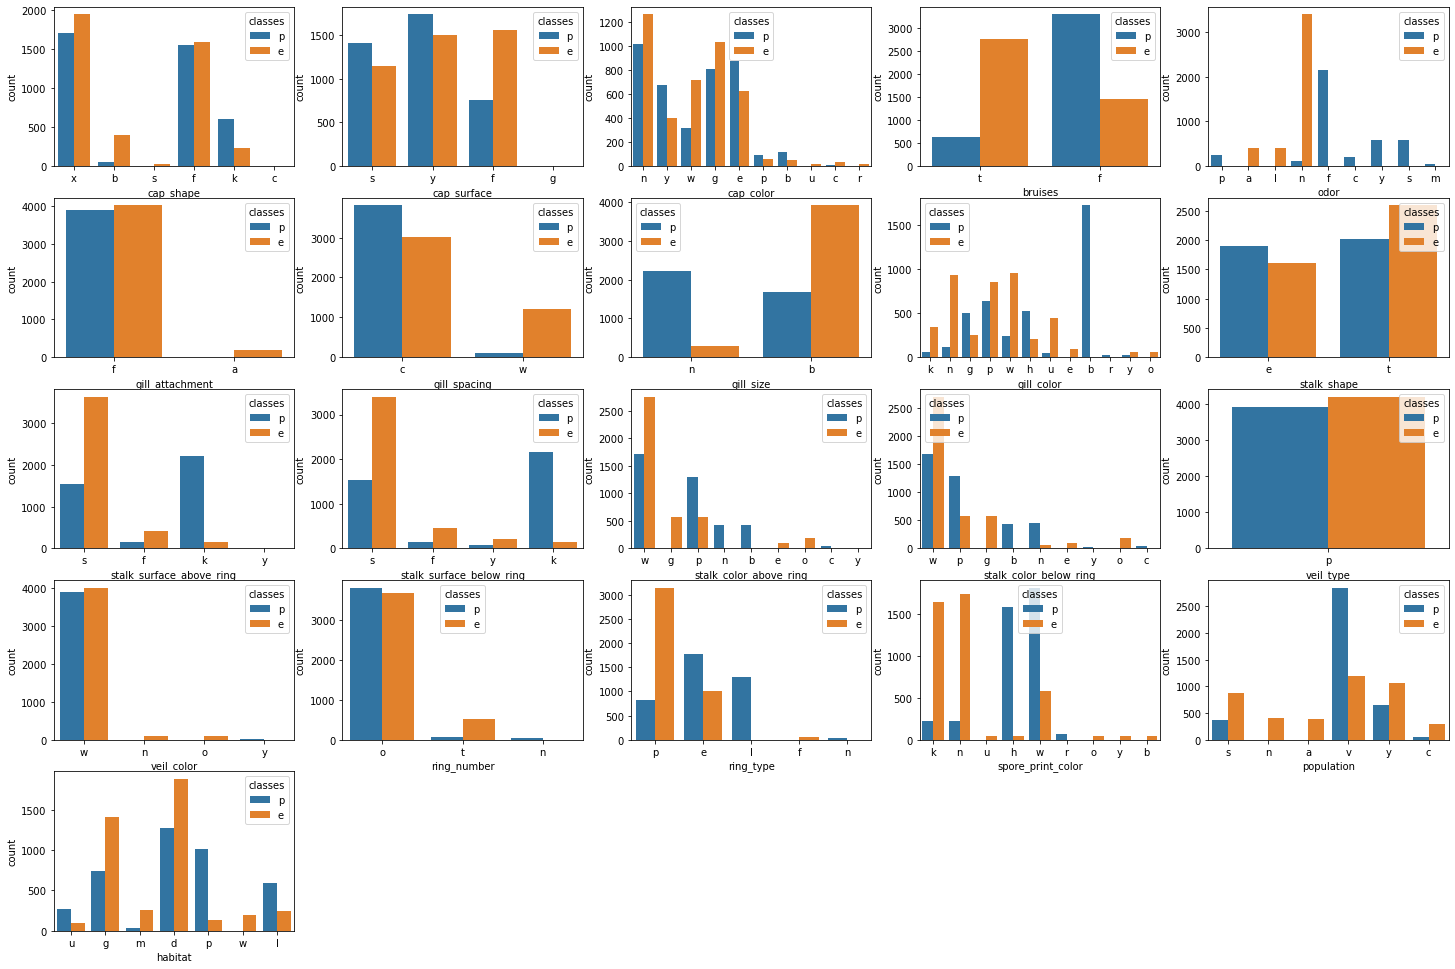

In [119]:
plt.figure(figsize=(25,17))
for i in range(1,len(df.columns)):
    plt.subplot(5,5,i)
    sns.countplot(x=df[df.columns[i]],hue=df['classes'])

In [120]:
# Label encoding for all the categorial columns, 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["classes"] = le.fit_transform(df["classes"])

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   classes                   8124 non-null   int64 
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_surface_above_ring  8124 non-null   object
 12  stalk_surface_below_ring  8124 non-null   object
 13  stalk_color_above_ring    8124 non-null   object
 14  stalk_color_below_ring  

In [122]:
col_drop, col_le, col_dummy =[], [], []
for i in range(len(df.columns)):
    if(df[df.columns[i]].nunique()==1): #collect columns with no variation
        col_drop.append(df.columns[i])
        
    elif(df[df.columns[i]].nunique()==2): #only two unique values
        col_le.append(df.columns[i])
        
    else:
        col_dummy.append(df.columns[i]) #more than two unique values
        
print(col_drop, col_le, col_dummy, sep='\n')

['veil_type']
['classes', 'bruises', 'gill_attachment', 'gill_spacing', 'gill_size', 'stalk_shape']
['cap_shape', 'cap_surface', 'cap_color', 'odor', 'gill_color', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']


In [123]:
# Drop the column with no variation:
df.drop(col_drop, axis=1, inplace =True)

In [124]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['classes']= label_encoder.fit_transform(df['classes'])
  
df['classes'].unique()

array([1, 0])

In [125]:
X = df.drop("classes", axis=1)
y = df['classes']

In [126]:
##One Hot Encoding
X = pd.get_dummies(X)

In [127]:
#Train test Split
seed = 42
validation_size =  0.3
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [128]:
# Test options and evaluation metric
num_folds = 10
seed = 42
scoring = 'accuracy'

In [131]:
%%time

##Models 
# Spot-Check Algorithms


models = []
models.append(('LR', LogisticRegression()))
models.append(('RF',  RandomForestClassifier()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.999296 (0.000862)
RF: 1.000000 (0.000000)
CPU times: user 7.77 s, sys: 1.59 s, total: 9.36 s
Wall time: 5.15 s


In [136]:
###pca component analysis
# feature extraction
pca = PCA(n_components=22)
fit = pca.fit(X_train)
# summarize components
print(fit.explained_variance_ratio_)
print(fit.components_)

[0.17076345 0.13160094 0.09344495 0.06159629 0.04026426 0.03810829
 0.03285178 0.02796463 0.027001   0.02198793 0.02089118 0.01948561
 0.01884674 0.01753509 0.01584303 0.0154302  0.01500277 0.01442508
 0.01376684 0.01219271 0.01126699 0.01045747]
[[-3.10248634e-02 -1.07182956e-04  2.59660061e-03 ...  1.08584352e-01
  -1.84769512e-02 -9.30469125e-03]
 [ 1.50731297e-02 -1.73828446e-04  2.51344887e-02 ...  2.93316102e-03
  -1.45413760e-03 -3.91787784e-03]
 [ 4.66246644e-02  4.57719382e-04 -8.26152610e-02 ... -2.30800376e-02
   1.46666563e-02  1.04376097e-02]
 ...
 [-3.47929861e-02  3.68729700e-03  5.36843017e-05 ... -1.51294647e-02
   1.16744515e-01 -1.12290145e-01]
 [ 5.64714838e-02  1.87612122e-05 -1.84649527e-01 ... -4.99869382e-01
   2.27090850e-02  1.47450446e-02]
 [-9.38566280e-02  1.52618039e-04  2.84561307e-02 ... -3.17283636e-01
   9.46210197e-02  1.05005358e-01]]


#### Graded Concept Question #2
It would npt be possible to train the two models if the response variable had been one hot encoded. Because one hot encoding produces two columns one for poisonous and the other edible.

In [141]:
%%time
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest


# Standardize the dataset
pipelines = []
pipelines.append(('PCA_LR', Pipeline([('pca', PCA(n_components=15)),('LR', LogisticRegression())])))
pipelines.append(('PCA_RF', Pipeline([('pca', PCA(n_components=10)),('LR', RandomForestClassifier())])))

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


PCA_LR: 0.968517 (0.008532)
PCA_RF: 0.999472 (0.001126)
CPU times: user 13.2 s, sys: 2.72 s, total: 15.9 s
Wall time: 10.6 s


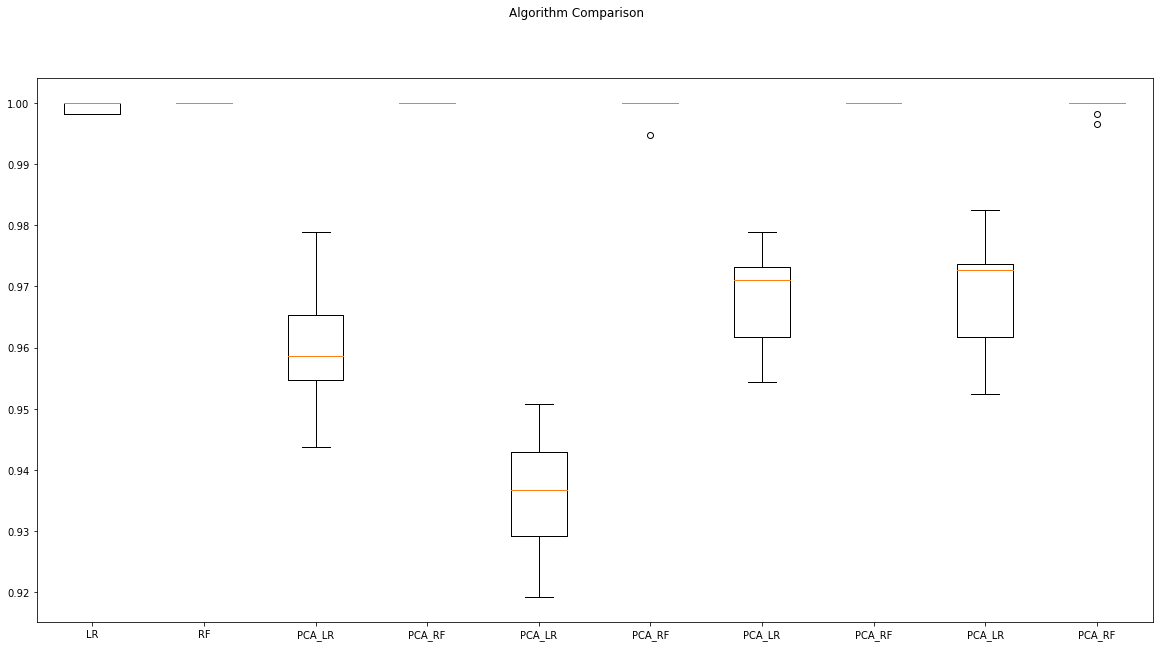

In [143]:
# Compare Algorithms
fig = plt.figure(figsize=(20,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [145]:
# prepare the model
model =LogisticRegression()
model.fit(X_train, Y_train)
# estimate accuracy on validation dataset
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


0.9995898277276456
[[1257    0]
 [   1 1180]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



Both models overfit the data.